<a href="https://colab.research.google.com/github/dariaccc/kaggle_loandataset/blob/main/kaggle_loan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#git

In [23]:
#used for shell commands
!ls

loan_approval_dataset.csv


In [2]:
!pip install -q kaggle
!pip install opendatasets

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"dariaccc","key":"deeaf9bb31a6088afc65f35aa9cf3c3b"}'}

In [4]:
import opendatasets as od
od.download ("https://www.kaggle.com/datasets/architsharma01/loan-approval-prediction-dataset/data")

Dataset URL: https://www.kaggle.com/datasets/architsharma01/loan-approval-prediction-dataset


In [23]:
#imports
from matplotlib import pyplot as plt #for scatter plot
from sklearn.linear_model import LogisticRegression #for logistic regression
from sklearn.model_selection import train_test_split #for splitting the data set
from sklearn.metrics import confusion_matrix, classification_report #for visualising the confusion matrix
from sklearn.preprocessing import OrdinalEncoder #for transforming rejected/approved to 0 and 1
from sklearn.tree import DecisionTreeClassifier #for decision tree classifier
import pandas as pd #to work with data

In [6]:
#generate the dataset from kaggle using pandas
loan_df = pd.read_csv("/content/loan-approval-prediction-dataset/loan_approval_dataset.csv")
loan_df.columns = loan_df.columns.str.strip() #remove spaces

loan_df["education"] = loan_df["education"].str.strip()
loan_df["self_employed"] = loan_df["self_employed"].str.strip()
loan_df.columns.tolist() #print list to get the correct names of columns

['loan_id',
 'no_of_dependents',
 'education',
 'self_employed',
 'income_annum',
 'loan_amount',
 'loan_term',
 'cibil_score',
 'residential_assets_value',
 'commercial_assets_value',
 'luxury_assets_value',
 'bank_asset_value',
 'loan_status']

In [7]:
#rejected/approved to binary values
loan_stat = [" Rejected", " Approved"]
enc = OrdinalEncoder(categories=[loan_stat])
loan_df["loan_status"] = enc.fit_transform(loan_df[["loan_status"]])
print(loan_df)

      loan_id  no_of_dependents     education self_employed  income_annum  \
0           1                 2      Graduate            No       9600000   
1           2                 0  Not Graduate           Yes       4100000   
2           3                 3      Graduate            No       9100000   
3           4                 3      Graduate            No       8200000   
4           5                 5  Not Graduate           Yes       9800000   
...       ...               ...           ...           ...           ...   
4264     4265                 5      Graduate           Yes       1000000   
4265     4266                 0  Not Graduate           Yes       3300000   
4266     4267                 2  Not Graduate            No       6500000   
4267     4268                 1  Not Graduate            No       4100000   
4268     4269                 1      Graduate            No       9200000   

      loan_amount  loan_term  cibil_score  residential_assets_value  \
0   

In [8]:
#binary values for graduate and self employed
grad = ["Not Graduate", "Graduate"]
enc = OrdinalEncoder(categories=[grad])
loan_df["education"] = enc.fit_transform(loan_df[["education"]])

employed = ["No", "Yes"]
enc = OrdinalEncoder(categories=[employed])
loan_df["self_employed"] = enc.fit_transform(loan_df[["self_employed"]])
print(loan_df)

      loan_id  no_of_dependents  education  self_employed  income_annum  \
0           1                 2        1.0            0.0       9600000   
1           2                 0        0.0            1.0       4100000   
2           3                 3        1.0            0.0       9100000   
3           4                 3        1.0            0.0       8200000   
4           5                 5        0.0            1.0       9800000   
...       ...               ...        ...            ...           ...   
4264     4265                 5        1.0            1.0       1000000   
4265     4266                 0        0.0            1.0       3300000   
4266     4267                 2        0.0            0.0       6500000   
4267     4268                 1        0.0            0.0       4100000   
4268     4269                 1        1.0            0.0       9200000   

      loan_amount  loan_term  cibil_score  residential_assets_value  \
0        29900000         12

In [9]:
#split the dataset
x = loan_df.drop(columns=["loan_status"])
y = loan_df["loan_status"]

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1, test_size=0.2)
#x_train.head()

In [10]:
print(x_train.dtypes)
print(y_train.dtypes)

loan_id                       int64
no_of_dependents              int64
education                   float64
self_employed               float64
income_annum                  int64
loan_amount                   int64
loan_term                     int64
cibil_score                   int64
residential_assets_value      int64
commercial_assets_value       int64
luxury_assets_value           int64
bank_asset_value              int64
dtype: object
float64


In [20]:
#create a logistic regression object then perform logistic regression
log_reg = LogisticRegression(max_iter=300)
log_reg.fit(x_train, y_train)
y_pred_lg = log_reg.predict(x_test)

In [24]:
#create the decision tree classifier and perform it
dec_tree = DecisionTreeClassifier()
dec_tree.fit(x_train, y_train)
y_pred_dtc = dec_tree.predict(x_test)

In [19]:
print(log_reg.score(x_test,y_test))
print(confusion_matrix(y_test, y_pred_lg))
print(classification_report(y_test, y_pred_lg))

0.7939110070257611
[[210 123]
 [ 53 468]]
              precision    recall  f1-score   support

         0.0       0.80      0.63      0.70       333
         1.0       0.79      0.90      0.84       521

    accuracy                           0.79       854
   macro avg       0.80      0.76      0.77       854
weighted avg       0.79      0.79      0.79       854



In [25]:
print(dec_tree.score(x_test,y_test))
print(confusion_matrix(y_test, y_pred_dtc))
print(classification_report(y_test, y_pred_dtc))

0.9672131147540983
[[323  10]
 [ 18 503]]
              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96       333
         1.0       0.98      0.97      0.97       521

    accuracy                           0.97       854
   macro avg       0.96      0.97      0.97       854
weighted avg       0.97      0.97      0.97       854



Text(0.5, 1.0, 'Decision Tree Classifier')

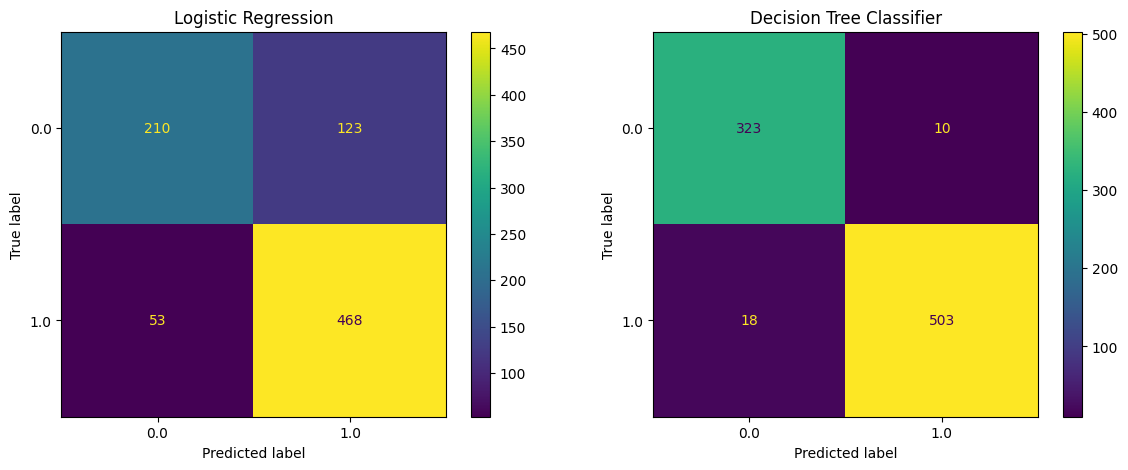

In [33]:
from sklearn.metrics import ConfusionMatrixDisplay

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

ConfusionMatrixDisplay.from_estimator(log_reg, x_test, y_test, ax=axes[0])
axes[0].set_title("Logistic Regression")

ConfusionMatrixDisplay.from_estimator(dec_tree, x_test, y_test, ax=axes[1])
axes[1].set_title("Decision Tree Classifier")